In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df=pd.read_csv('../data/data.csv')

In [34]:
df.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,0,0,0,0,0,0,1,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["overall_rating"],axis=1)
y = df['overall_rating']

## Feature Selection

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import AdaBoostRegressor

In [37]:
estimator = AdaBoostRegressor(random_state=0, n_estimators=50)
selector = SelectFromModel(estimator)
selector = selector.fit(X, y) 

In [38]:
status = selector.get_support()
print("Selection status: ", status)

Selection status:  [ True False  True  True False False  True False False False  True False
 False False  True False  True False False  True False  True False False
 False False  True False False  True False  True  True False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False]


In [39]:
features = np.array(X.columns)
print("All features:")
print(features) 
  
print("Selected features:")
print(features[status])
selector.transform(X) 

All features:
['potential' 'crossing' 'finishing' 'heading_accuracy' 'short_passing'
 'volleys' 'dribbling' 'curve' 'free_kick_accuracy' 'long_passing'
 'ball_control' 'acceleration' 'sprint_speed' 'agility' 'reactions'
 'balance' 'shot_power' 'jumping' 'stamina' 'strength' 'long_shots'
 'aggression' 'interceptions' 'positioning' 'vision' 'penalties' 'marking'
 'standing_tackle' 'sliding_tackle' 'gk_diving' 'gk_handling' 'gk_kicking'
 'gk_positioning' 'gk_reflexes' 'preferred_foot_right'
 'attacking_work_rate_high' 'attacking_work_rate_le'
 'attacking_work_rate_low' 'attacking_work_rate_medium'
 'attacking_work_rate_norm' 'attacking_work_rate_stoc'
 'attacking_work_rate_y' 'defensive_work_rate_1' 'defensive_work_rate_2'
 'defensive_work_rate_3' 'defensive_work_rate_4' 'defensive_work_rate_5'
 'defensive_work_rate_6' 'defensive_work_rate_7' 'defensive_work_rate_8'
 'defensive_work_rate_9' 'defensive_work_rate_ean'
 'defensive_work_rate_es' 'defensive_work_rate_high'
 'defensive_work_rat

array([[71., 44., 71., ...,  6., 10.,  8.],
       [71., 44., 71., ...,  6., 10.,  8.],
       [66., 44., 71., ...,  6., 10.,  8.],
       ...,
       [80., 71., 53., ...,  9., 73., 20.],
       [81., 64., 57., ...,  9., 73., 20.],
       [81., 68., 57., ...,  9., 78.,  7.]])

In [40]:
X=X[features[status]]
X

,potential,finishing,heading_accuracy,dribbling,ball_control,reactions,shot_power,strength,aggression,marking,gk_diving,gk_kicking,gk_positioning
0,71.0,44.0,71.0,51.0,49.0,47.0,55.0,76.0,71.0,65.0,6.0,10.0,8.0
1,71.0,44.0,71.0,51.0,49.0,47.0,55.0,76.0,71.0,65.0,6.0,10.0,8.0
2,66.0,44.0,71.0,51.0,49.0,47.0,55.0,76.0,63.0,65.0,6.0,10.0,8.0
3,65.0,43.0,70.0,50.0,48.0,46.0,54.0,76.0,62.0,62.0,5.0,9.0,7.0
4,65.0,43.0,70.0,50.0,48.0,46.0,54.0,76.0,62.0,62.0,5.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
180349,85.0,77.0,59.0,84.0,85.0,86.0,76.0,67.0,56.0,22.0,9.0,84.0,20.0
180350,80.0,76.0,53.0,85.0,86.0,74.0,75.0,65.0,61.0,32.0,9.0,73.0,20.0
180351,80.0,71.0,53.0,85.0,86.0,74.0,75.0,65.0,67.0,32.0,9.0,73.0,20.0
180352,81.0,64.0,57.0,87.0,91.0,69.0,72.0,59.0,63.0,28.0,9.0,73.0,20.0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

# Models

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [43]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    adj_r2 = 1 - (1-r_squared)*(len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)
    return mae, mse, rmse, r_squared, adj_r2

In [44]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","Adj. R2 Score","RMSE (Cross-Validation)"])

## Linear Regression

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.1875358361524246
MSE: 8.186901271609347
RMSE: 2.861276161367397
R2 Score: 0.8350806116142908
Adj. R2 Score: 0.835044580623433
------------------------------
RMSE Cross-Validation: 2.8632305198037127


## Ridge Regression

In [46]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.187535838516722
MSE: 8.186901259659997
RMSE: 2.8612761592792815
R2 Score: 0.835080611855002
Adj. R2 Score: 0.8350445808641968
------------------------------
RMSE Cross-Validation: 2.863230518979775


## Lasso Regression

In [47]:
lasso = Lasso()
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.1947691581597826
MSE: 8.28217047833723
RMSE: 2.8778760359572875
R2 Score: 0.8331614802134958
Adj. R2 Score: 0.833125029937758
------------------------------
RMSE Cross-Validation: 2.880146311248193


## ElasticNet 

In [48]:
elastic_net = ElasticNet()
elastic_net.fit(X_train, y_train)
predictions = elastic_net.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 2.188230137332932
MSE: 8.214934287403063
RMSE: 2.86617066613331
R2 Score: 0.8345159061578639
Adj. R2 Score: 0.8344797517922025
------------------------------
RMSE Cross-Validation: 2.8682424482928384


## RandomForestRegressor

In [49]:
random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 0.6510087263655396
MSE: 1.2725479836431555
RMSE: 1.1280726854432543
R2 Score: 0.9743654127256085
Adj. R2 Score: 0.9743598121737949
------------------------------
RMSE Cross-Validation: 1.8363026998648806


## XGBoostRegressor

In [50]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared, adj_r2 = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("Adj. R2 Score:", adj_r2)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "Adj. R2 Score": adj_r2, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 1.2226960781647405
MSE: 2.809932347640984
RMSE: 1.676285282295643
R2 Score: 0.943395882177644
Adj. R2 Score: 0.9433835155149264
------------------------------
RMSE Cross-Validation: 1.7740895911912886


## Model Comparison

In [51]:
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,Adj. R2 Score,RMSE (Cross-Validation)
5,XGBRegressor,1.222696,2.809932,1.676285,0.943396,0.943384,1.774090
4,RandomForestRegressor,0.651009,1.272548,1.128073,0.974365,0.974360,1.836303
1,Ridge,2.187536,8.186901,2.861276,0.835081,0.835045,2.863231
0,LinearRegression,2.187536,8.186901,2.861276,0.835081,0.835045,2.863231
3,ElasticNet,2.188230,8.214934,2.866171,0.834516,0.834480,2.868242
2,Lasso,2.194769,8.282170,2.877876,0.833161,0.833125,2.880146


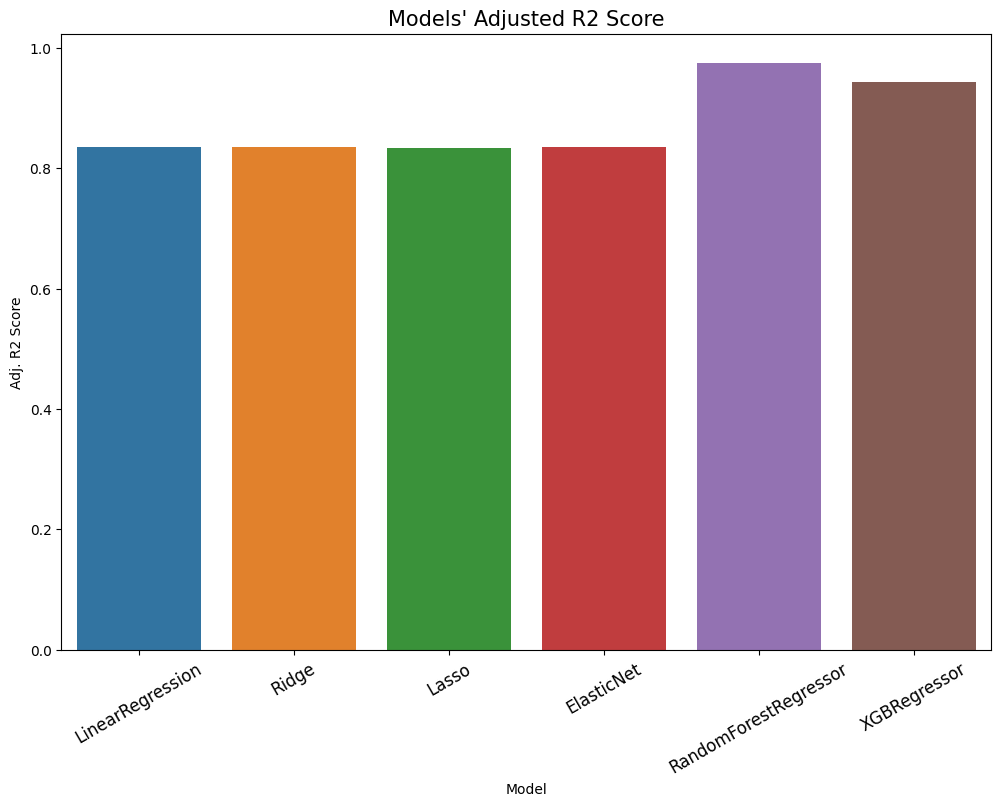

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["Adj. R2 Score"])
plt.title("Models' Adjusted R2 Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Model Selected : Random Forest Regressor

In [53]:
y_test=pd.DataFrame(y_test)
y_test=y_test.reset_index()
y_test=y_test.drop(['index'],axis=1)

In [54]:
predictions = random_forest.predict(X_test)
b=pd.DataFrame(predictions,columns=['Predictions'])

Text(0, 0.5, 'Predicted Y')

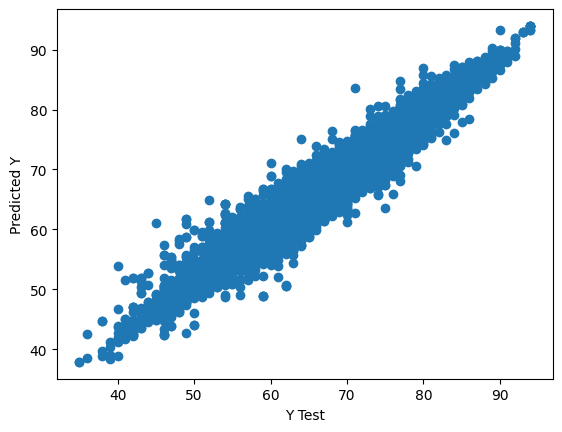

In [55]:
plt.scatter(y_test,b)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [56]:
pd.concat([y_test,b['Predictions'].apply(np.ceil)], axis=1)

,overall_rating,Predictions
0,61.0,61.0
1,63.0,66.0
2,82.0,77.0
3,75.0,75.0
4,64.0,64.0
...,...,...
59512,68.0,69.0
59513,71.0,71.0
59514,69.0,69.0
59515,61.0,61.0


In [57]:
print("Accuracy on the Train data is {} % for our Random Forest Regression model.".format(np.round(100*r2_score(y_train,random_forest.predict(X_train)),decimals=2)))
print("Accuracy on the Test data is {} % for our Random Forest Regression model.".format(np.round(100*r2_score(y_test,random_forest.predict(X_test)),decimals=2)))

Accuracy on the Train data is 99.56 % for our Random Forest Regression model.
Accuracy on the Test data is 97.44 % for our Random Forest Regression model.


## Serialization

In [63]:
from pickle import dump
dump(random_forest,open('../model.pkl','wb'))

In [70]:
from pickle import load
x_input=[71.0,44.0,71.0,51.0,49.0,47.0,55.0,76.0,71.0,65.0,6.0,10.0,8.0]
            
filename = '../model.pkl'
loaded_model = load(open(filename, 'rb')) # loading the model file
      
prediction=loaded_model.predict([x_input])[0]

prediction

66.4